# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/cf72033452b01be31d061c5e1a6a67b550983a5b53df44866f4b108c.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **New York, New York, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'cf72033452b01be31d061c5e1a6a67b550983a5b53df44866f4b108c')

In [2]:
def retrieve_data():
    """ Returns data for assignment """
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/cf72033452b01be31d061c5e1a6a67b550983a5b53df44866f4b108c.csv')
    
    # Spread Elements column into TMAX & TMIN, let go of ID
    df = df.reset_index().pivot_table(columns = 'Element', index='Date', values='Data_Value')
    df.index = df.index.to_datetime()
    df.index.rename('Date', inplace=True)
    df.columns = ['TMAX', 'TMIN']
    
    # Remove leap-days
    df = df.loc[(df.index != '2004-02-29')]
    df = df.loc[(df.index != '2008-02-29')]
    df = df.loc[(df.index != '2012-02-29')]
    
    return df

In [3]:
# Check DataFrame
df = retrieve_data()
df.info()
df.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4015 entries, 2005-01-01 to 2015-12-31
Data columns (total 2 columns):
TMAX    4015 non-null float64
TMIN    4015 non-null float64
dtypes: float64(2)
memory usage: 94.1 KB


,TMAX,TMIN
Date,,
2005-01-01,129.565217,9.272727
2005-01-02,92.541667,-19.583333
2005-01-03,104.565217,29.523810
2005-01-04,100.695652,42.772727
2005-01-05,66.173913,4.458333


In [4]:
# Set up inline
%matplotlib notebook

<IPython.core.display.Javascript object>


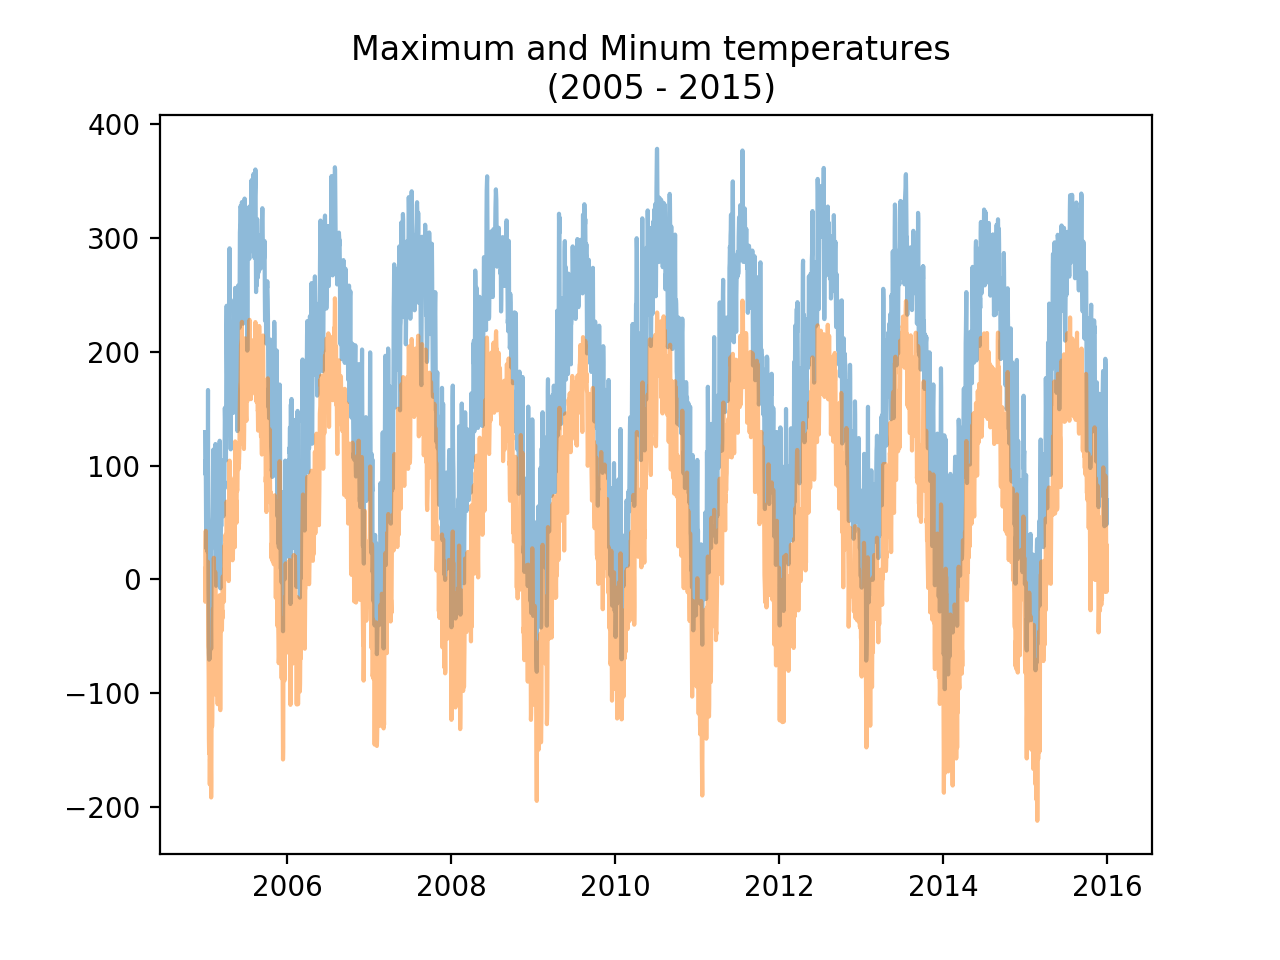

In [5]:
# First cursory plot
plt.figure()
plt.plot(df.TMAX, '-', df.TMIN, '-', alpha=0.5)
plt.title('Maximum and Minum temperatures \n (2005 - 2015)')

In [6]:
# Separate data into
df = retrieve_data()

# 2015 data
mask_15= (df.index >= '2015-01-01')
df_15 = df.loc[mask_15]

# 2005-2014 data
mask_05_14 = (df.index < '2015-01-01')
df_05_14 = df.loc[mask_05_14]

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


<IPython.core.display.Javascript object>


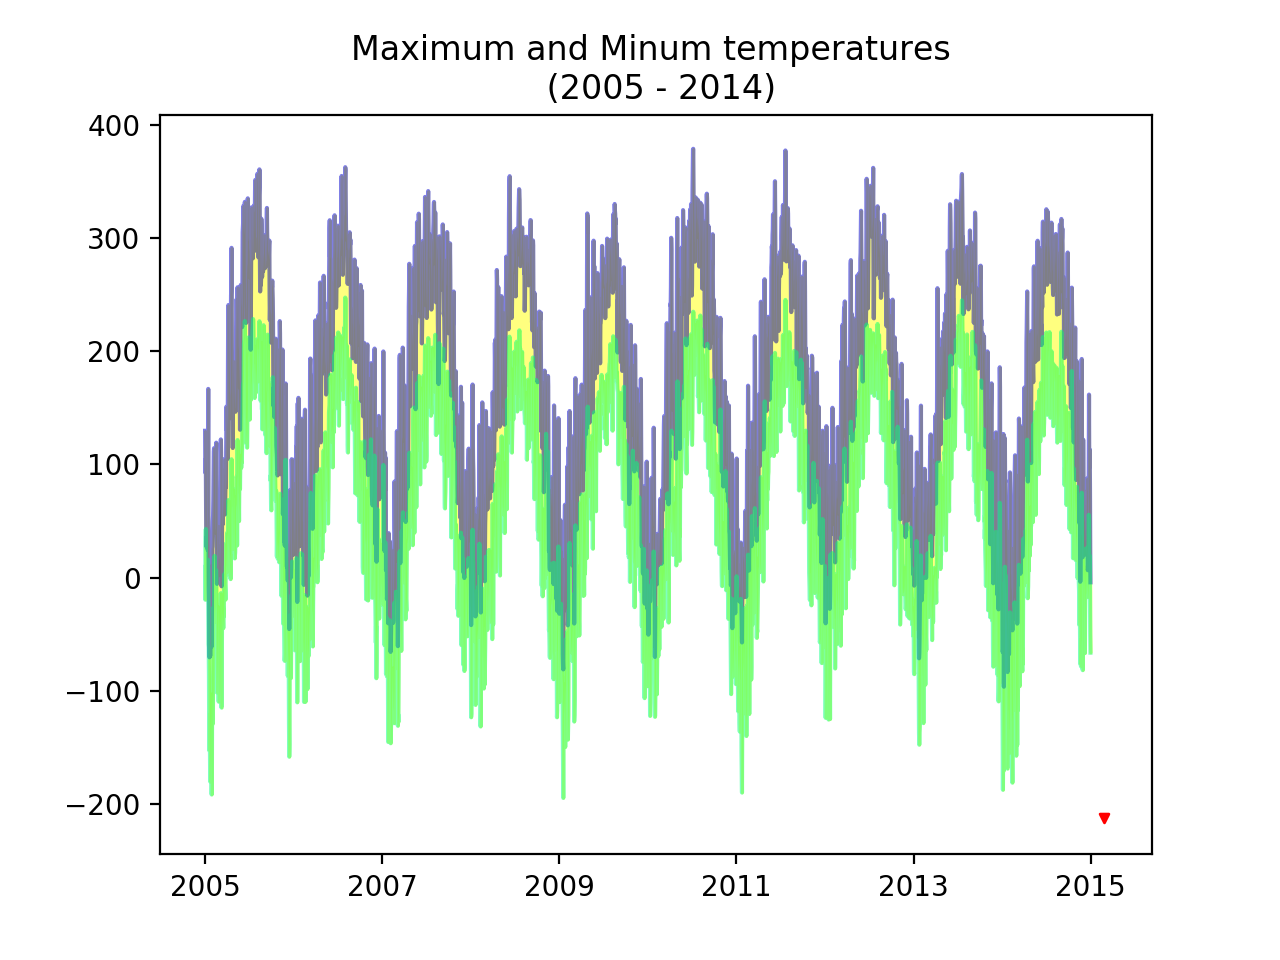

In [7]:

# First cursory plot
plt.figure()
plt.plot(df_05_14.TMAX, '#0000CC', df_05_14.TMIN, '#00FF80', alpha=0.5)
plt.gca().fill_between(df_05_14.index, df_05_14.TMAX, df_05_14.TMIN, color = '#FFFF00', alpha = 0.5)
plt.title('Maximum and Minum temperatures \n (2005 - 2014)')

In [8]:
# Find max and min scores for 2005 and 2014 data
max_rec = df_05_14.TMAX.max()
min_rec = df_05_14.TMIN.min()

In [9]:
# Retain record breakers only
max_rec_mask = (df_15.TMAX > max_rec)
min_rec_mask = (df_15.TMIN < min_rec)

record_breaker = df_15.loc[(min_rec_mask | max_rec_mask)]

In [10]:
# Include record breaker
plt.scatter(record_breaker.index, record_breaker.TMIN, s = 10, color = 'red', marker = 'v')

In [11]:
# Next step : Have index by day and month of the year, with columns for the different years. Plot accordingly 

In [12]:
# Separate data into individual years
df = retrieve_data()

df_05 = df[(df.index >= '2005-01-01') & (df.index < '2006-01-01')]

df_06 = df[(df.index >= '2006-01-01') & (df.index < '2007-01-01')]

df_07 = df[(df.index >= '2007-01-01') & (df.index < '2008-01-01')]

df_08 = df[(df.index >= '2008-01-01') & (df.index < '2009-01-01')]

df_09 = df[(df.index >= '2009-01-01') & (df.index < '2010-01-01')]

df_10 = df[(df.index >= '2010-01-01') & (df.index < '2011-01-01')]

df_11 = df[(df.index >= '2011-01-01') & (df.index < '2012-01-01')]

df_12 = df[(df.index >= '2012-01-01') & (df.index < '2013-01-01')]

df_13 = df[(df.index >= '2013-01-01') & (df.index < '2014-01-01')]

df_14 = df[(df.index >= '2014-01-01') & (df.index < '2015-01-01')]

df_15 = df[(df.index >= '2015-01-01') & (df.index < '2016-01-01')]

# Remove year function
def remove_year(df):
    """Removes year from dataframe index"""
    return df.index.strftime('%m-%d')

# Remove year for all dataframes
df_05.index = remove_year(df_05)

df_06.index = remove_year(df_06)

df_07.index = remove_year(df_07)

df_08.index = remove_year(df_08)

df_09.index = remove_year(df_09)

df_10.index = remove_year(df_10)

df_11.index = remove_year(df_11)

df_12.index = remove_year(df_12)

df_13.index = remove_year(df_13)

df_14.index = remove_year(df_14)

df_15.index = remove_year(df_15)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


In [13]:
#df_05.index = pd.to_datetime(df_05.index, format = '%m-%d')
# They will all have the same year, 2017, which I can then hide for plotting purposes

df_05.index = df_05.index.to_datetime()
df_06.index = df_06.index.to_datetime()
df_07.index = df_07.index.to_datetime()
df_08.index = df_08.index.to_datetime()
df_09.index = df_09.index.to_datetime()
df_10.index = df_10.index.to_datetime()
df_11.index = df_11.index.to_datetime()
df_12.index = df_12.index.to_datetime()
df_13.index = df_13.index.to_datetime()
df_14.index = df_14.index.to_datetime()
df_15.index = df_15.index.to_datetime()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: to_dateti

<IPython.core.display.Javascript object>


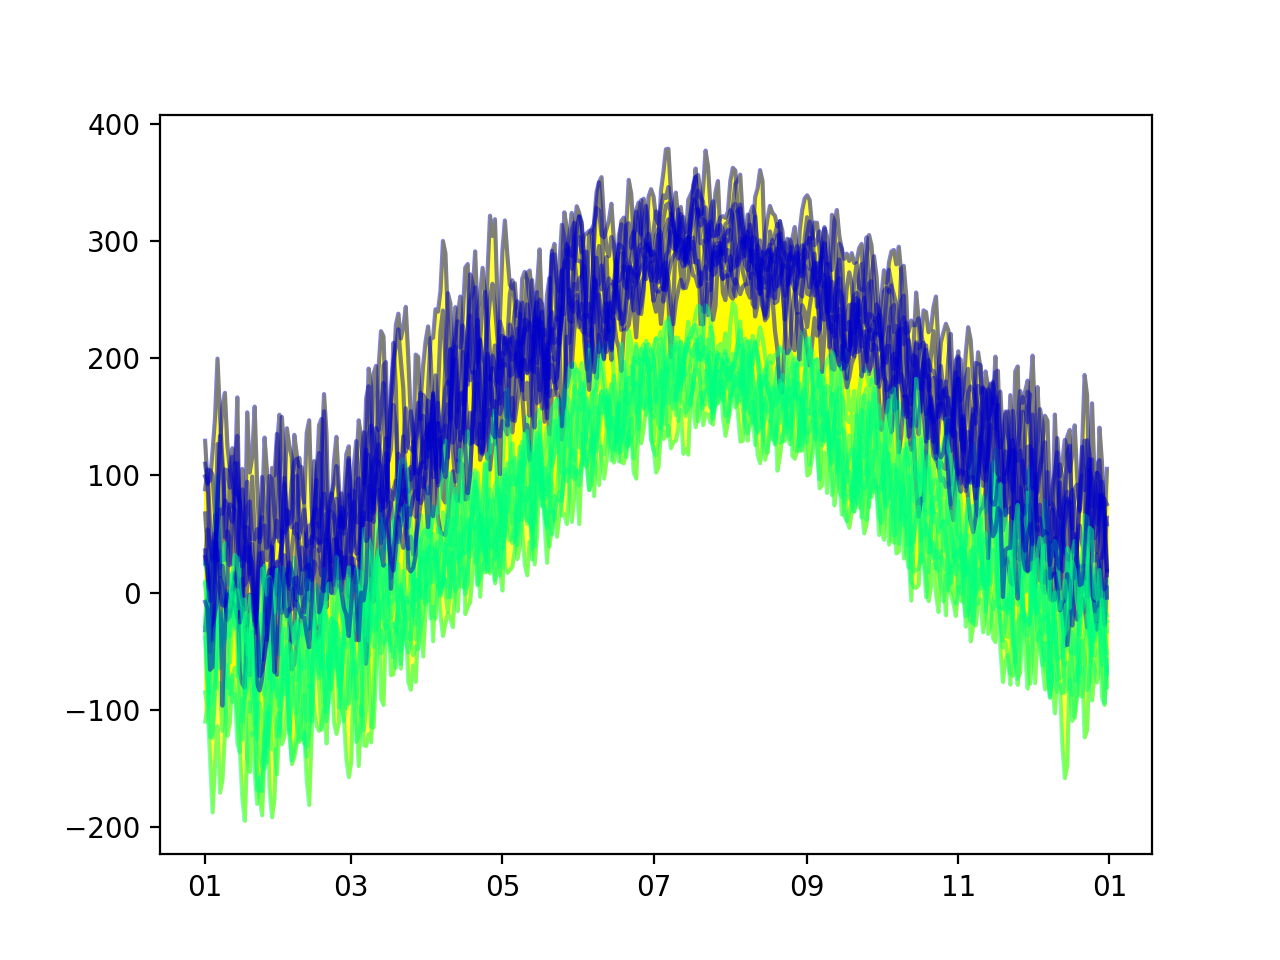

In [14]:
plt.figure()
plt.plot(df_05.TMAX, '#0000CC',df_05.TMIN, '#00FF80', alpha = 0.5)
plt.plot(df_06.TMAX, '#0000CC',df_06.TMIN, '#00FF80', alpha = 0.5)
plt.plot(df_07.TMAX, '#0000CC',df_07.TMIN, '#00FF80', alpha = 0.5)
plt.plot(df_08.TMAX, '#0000CC',df_08.TMIN, '#00FF80', alpha = 0.5)
plt.plot(df_09.TMAX, '#0000CC',df_09.TMIN, '#00FF80', alpha = 0.5)
plt.plot(df_10.TMAX, '#0000CC',df_10.TMIN, '#00FF80', alpha = 0.5)
plt.plot(df_11.TMAX, '#0000CC',df_11.TMIN, '#00FF80', alpha = 0.5)
plt.plot(df_12.TMAX, '#0000CC',df_12.TMIN, '#00FF80', alpha = 0.5)
plt.plot(df_13.TMAX, '#0000CC',df_13.TMIN, '#00FF80', alpha = 0.5)
plt.plot(df_14.TMAX, '#0000CC',df_14.TMIN, '#00FF80', alpha = 0.5)




In [16]:
# Fill in between 
plt.gca().fill_between(df_05.index, df_05.TMAX, df_05.TMIN, color = '#FFFF00', alpha = 0.5)
plt.gca().fill_between(df_06.index, df_06.TMAX, df_06.TMIN, color = '#FFFF00', alpha = 0.5)
plt.gca().fill_between(df_07.index, df_07.TMAX, df_07.TMIN, color = '#FFFF00', alpha = 0.5)
plt.gca().fill_between(df_08.index, df_08.TMAX, df_08.TMIN, color = '#FFFF00', alpha = 0.5)
plt.gca().fill_between(df_09.index, df_09.TMAX, df_09.TMIN, color = '#FFFF00', alpha = 0.5)
plt.gca().fill_between(df_10.index, df_10.TMAX, df_10.TMIN, color = '#FFFF00', alpha = 0.5)
plt.gca().fill_between(df_11.index, df_11.TMAX, df_11.TMIN, color = '#FFFF00', alpha = 0.5)
plt.gca().fill_between(df_12.index, df_12.TMAX, df_12.TMIN, color = '#FFFF00', alpha = 0.5)
plt.gca().fill_between(df_13.index, df_13.TMAX, df_13.TMIN, color = '#FFFF00', alpha = 0.5)
plt.gca().fill_between(df_14.index, df_14.TMAX, df_14.TMIN, color = '#FFFF00', alpha = 0.5)

In [17]:
# Set x axis as months
import matplotlib.dates as mdates
monthsFmt = mdates.DateFormatter('%m')
plt.gca().xaxis.set_major_formatter(monthsFmt)

In [18]:
# Find record high and record low temperatures over period 2005-2014 and keep them in their own separate column
# One value per day of the year
df_05_14 = retrieve_data()
df_05_14.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


,TMAX,TMIN
Date,,
2005-01-01,129.565217,9.272727
2005-01-02,92.541667,-19.583333
2005-01-03,104.565217,29.523810
2005-01-04,100.695652,42.772727
2005-01-05,66.173913,4.458333


In [19]:
#use period index to separate them into columns by year
#then find maximum and minimum across row

In [20]:
def holistic_dataframe():
    dfh = pd.merge(df_05,df_06, how='outer', left_index=True, right_index=True)
    dfh = pd.merge(dfh,df_07, how='outer', left_index=True, right_index=True)
    dfh = pd.merge(dfh,df_08, how='outer', left_index=True, right_index=True)
    dfh = pd.merge(dfh,df_09, how='outer', left_index=True, right_index=True)
    dfh = pd.merge(dfh,df_10, how='outer', left_index=True, right_index=True)
    dfh = pd.merge(dfh,df_11, how='outer', left_index=True, right_index=True)
    dfh = pd.merge(dfh,df_12, how='outer', left_index=True, right_index=True)
    dfh = pd.merge(dfh,df_13, how='outer', left_index=True, right_index=True)
    dfh = pd.merge(dfh,df_14, how='outer', left_index=True, right_index=True)
    
    return dfh

dfh = holistic_dataframe()
dfh.head()

,TMAX_x,TMIN_x,TMAX_y,TMIN_y,TMAX_x,TMIN_x,TMAX_y,TMIN_y,TMAX_x,TMIN_x,TMAX_y,TMIN_y,TMAX_x,TMIN_x,TMAX_y,TMIN_y,TMAX_x,TMIN_x,TMAX_y,TMIN_y
2017-01-01,129.565217,9.272727,24.727273,-28.181818,99.181818,25.681818,67.565217,-30.086957,-32.000000,-110.043478,30.368421,-25.833333,88.190476,-22.285714,109.947368,7.473684,36.055556,-38.611111,-7.866667,-85.066667
2017-01-02,92.541667,-19.583333,53.954545,-4.318182,94.260870,14.826087,38.818182,-62.652174,-14.043478,-98.695652,20.090909,-74.714286,105.090909,1.095238,95.500000,-5.900000,13.555556,-83.333333,-13.733333,-96.800000
2017-01-03,104.565217,29.523810,41.954545,-3.454545,95.500000,-24.000000,-42.000000,-123.391304,15.956522,-53.652174,-50.476190,-96.136364,56.900000,-41.047619,19.111111,-80.105263,-7.166667,-85.333333,-65.769231,-141.769231
2017-01-04,100.695652,42.772727,26.863636,-34.636364,120.043478,-6.913043,-24.913043,-120.478261,34.208333,-61.583333,-34.714286,-84.750000,29.772727,-56.545455,-40.421053,-123.900000,14.777778,-59.444444,-63.538462,-187.461538
2017-01-05,66.173913,4.458333,66.086957,-11.043478,148.826087,42.434783,35.863636,-73.954545,50.708333,-28.956522,-18.045455,-77.809524,43.136364,-51.619048,7.100000,-87.105263,41.388889,-30.500000,3.461538,-146.538462


In [21]:
# Record Setters
max_records = dfh.max(axis=1)
min_records = dfh.min(axis=1)

# Record breakers
max_breaker = df_15.TMAX[(df_15.TMAX > max_records)]
min_breaker = df_15.TMIN[(df_15.TMIN < min_records)]

<IPython.core.display.Javascript object>


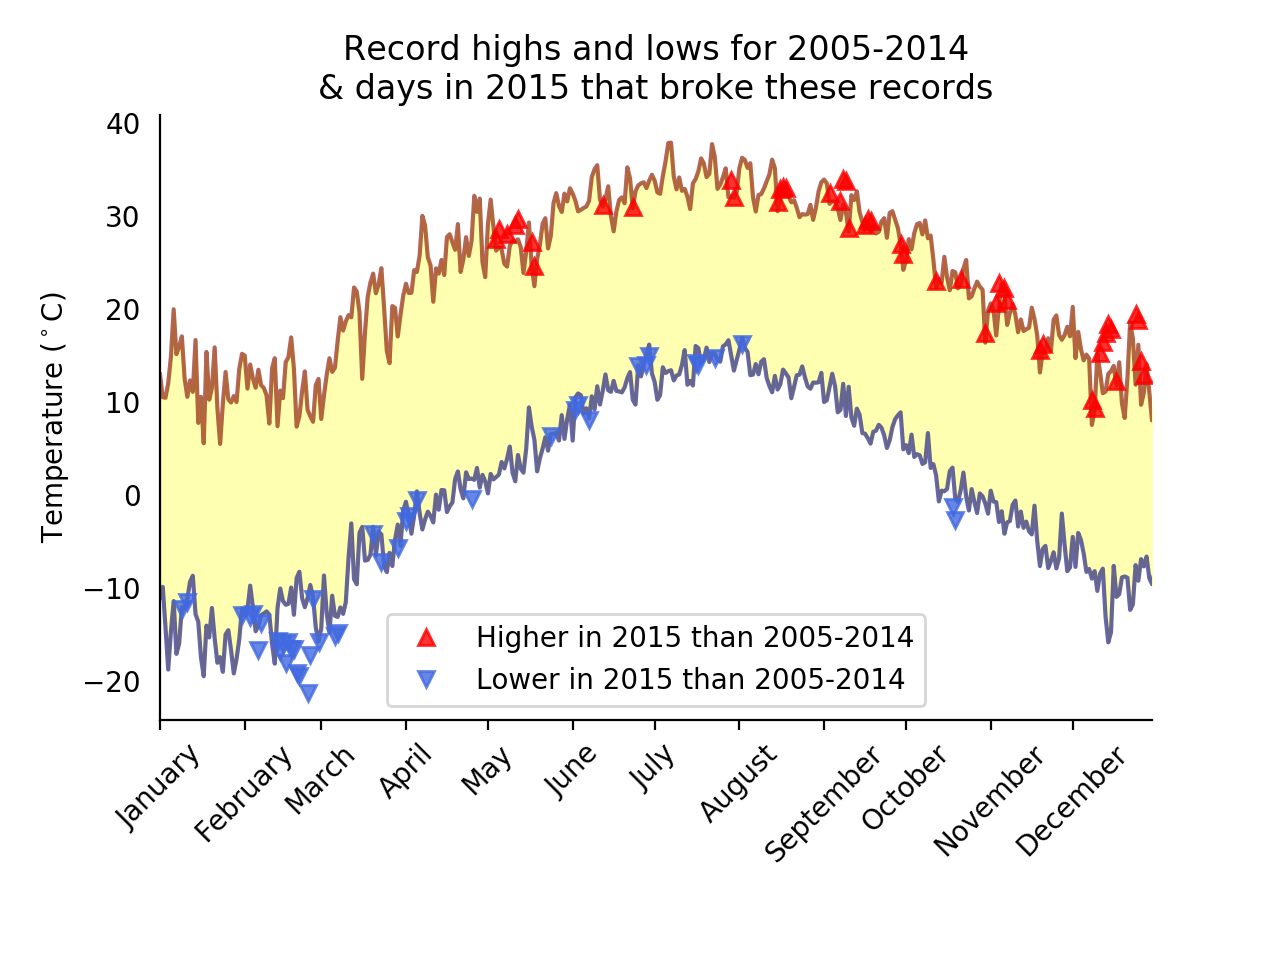

In [50]:
plt.figure()

# Plot record setters for max and min temperatures by day during 2005-2014
plt.plot(max_records/10, 'maroon', alpha = 0.6)
plt.plot(min_records/10, 'darkblue', alpha = 0.6)
#label = 'Record high for 2005-2014'
#label = 'Record low for 2005-2014'
# Fill in between
plt.fill_between(max_records.index, max_records/10, min_records/10, color = 'yellow', alpha = 0.3)

# Plot record breakers
plt.plot(max_breaker/10, '^', color = 'red', alpha = 0.8, label = 'Higher in 2015 than 2005-2014')
plt.plot(min_breaker/10, 'v', color = 'royalblue', alpha = 0.8, label = 'Lower in 2015 than 2005-2014')

# Title
plt.title('Record highs and lows for 2005-2014\n& days in 2015 that broke these records')

# Axes Labels
plt.ylabel('Temperature ($^\circ$C)')
# x-axis by month
monthsFmt = mdates.DateFormatter('%m')
plt.gca().xaxis.set_major_formatter(monthsFmt)

# set x_axis limits with date time values
ax = plt.gca()
ax.set_xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2017-12-30'))
#ax.set_ylim(-400,400)
# remove splines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='on', left='off', right='off', labelleft='on', labelbottom='on')

# Legend
plt.legend()

# 
dates = ['January','February','March','April','May','June','July','August','September','October','November','December']
ax.set_xticklabels(dates, rotation=45)

# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

In [32]:
# Save figure
plt.savefig('Assignment2.pdf')